# Implies Logic - With Back Propagation + Activation Function

| Input 1 (x0) | Input 2 (x1) | Expected Output (ye)|
|-----|----|----|
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

- Simple Neural network with one layer of 8 neurons, With Activation Function
- Back Propagation with Gradient descent with $loss = (expected-actual)^2$
- ya - Actual output from the network , ye - Expected output

In [17]:
# uncomment ot install dependencies
#!pip install numpy
#!pip install matplotlib
#!pip install graphviz

In [18]:
import numpy as np;
import matplotlib.pyplot as plt
from graphviz import Digraph
import math
from IPython.display import clear_output
import time

## Inputs and expected output

In [19]:
# x is input contains two values x0 or x1
# y is output contains one value 0 or 1 

# training set
x = np.array([[0,0],[0,1],[1,0],[1,1]], dtype='float64') # input can not change x0, x1
y = np.array([1,1,0,1], dtype='float64') # ye - expected output, can not change, we expect this to be the output from the neural network
# for this example we assume any value in output <= 0.5 as 0 and anything > 0.5 as 1.

## Neural Network Structure

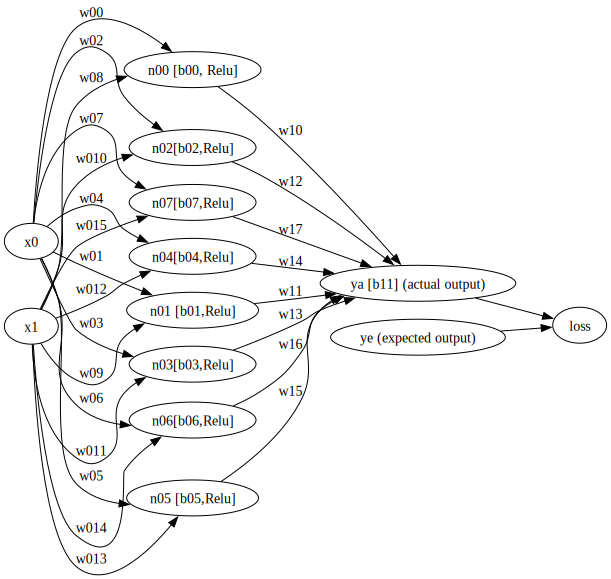

In [20]:
dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
input_layer = ["x0","x1"] # two inputs
layer_one_neurons = ["n00 [b00, Relu]","n01 [b01,Relu]","n02[b02,Relu]","n03[b03,Relu]", "n04[b04,Relu]"] # layer 0 , has 3 neurons , namely 0,1,2
layer_one_neurons += ["n05 [b05,Relu]","n06[b06,Relu]","n07[b07,Relu]"]
#layer_two_neurons = ["n10 [w10, b10, relu10]","n11 [w11,b11, relu11]","n12 [w12,b12, relu12]"] # layer 0 , has 3 neurons , namely 0,1,2
output_layer_neurons = ["ya [b11] (actual output)"] # actual output
loss = ["loss"]
expected_output = ["ye (expected output)"] # expected output

# products
for ii, i in enumerate(input_layer):
    for ij, j in enumerate(layer_one_neurons):
        dot.edge(i,j,"w"+str(0)+""+str(len(layer_one_neurons) * ii + ij))

for ii,i in enumerate(layer_one_neurons):
    for ij,j in enumerate(output_layer_neurons):
        dot.edge(i,j,"w"+str(1)+""+str(len(output_layer_neurons) * ii + ij))

for i in output_layer_neurons:
    for j in loss:
        dot.edge(i,j)

for i in expected_output:
    for j in loss:
        dot.edge(i,j)



dot

## Parameters - Trainable, change over the period of time

In [21]:
# each path has a weight wln and each neuron has a bias bln.
neurons = [2,8,1]
nWeights = [i*j for i,j in zip(neurons, neurons[1:])]
nBias = [i for i in neurons[1:]]

#parameters : things that change during the training.
np.random.seed(777)
# layer 1
i = 0
nw = nWeights[i]
nb = nBias[i]
w0 = np.random.uniform(-1,1,(nw)).reshape(neurons[i], neurons[i+1])
b0 = np.random.uniform(1,1,(nb)).reshape(1,neurons[i+1])
gw0 = np.full((nw),0.0, dtype='float64').reshape(neurons[i], neurons[i+1])
gb0 = np.full((nb),0.0, dtype='float64').reshape(1,neurons[i+1])

# layer 2
i += 1
nw = nWeights[i]
nb = nBias[i]
w1 = np.random.uniform(-1,1,(nw)).reshape(neurons[i], neurons[i+1])
b1 = np.random.uniform(1,1,(nb)).reshape(1,neurons[i+1])
gw1 = np.full((nw),0.0, dtype='float64').reshape(neurons[i], neurons[i+1])
gb1 = np.full((nb),0.0, dtype='float64').reshape(1,neurons[i+1])

def resetAllParameters():
    np.random.seed(777)
    global neurons,nWeights,nBias
    global w0, b0, gw0, gb0
    global w1, b1, gw1, gb1
    
    # layer 1
    i = 0
    nw = nWeights[i]
    nb = nBias[i]
    w0 = np.random.uniform(-1,1,(nw)).reshape(neurons[i], neurons[i+1])
    b0 = np.random.uniform(-1,1,(nb)).reshape(1,neurons[i+1])
    gw0 = np.full((nw),0.0, dtype='float64').reshape(neurons[i], neurons[i+1])
    gb0 = np.full((nb),0.0, dtype='float64').reshape(1,neurons[i+1])
    
    # layer 2
    i += 1
    nw = nWeights[i]
    nb = nBias[i]
    w1 = np.random.uniform(-1,1,(nw)).reshape(neurons[i], neurons[i+1])
    b1 = np.random.uniform(-1,1,(nb)).reshape(1,neurons[i+1])
    gw1 = np.full((nw),0.0, dtype='float64').reshape(neurons[i], neurons[i+1])
    gb1 = np.full((nb),0.0, dtype='float64').reshape(1,neurons[i+1])

def reset_gradients():
    np.random.seed(777)
    global neurons,nWeights,nBias
    global w0, b0, gw0, gb0
    global w1, b1, gw1, gb1
    
    # layer 1
    i = 0
    nw = nWeights[i]
    nb = nBias[i]
    gw0 = np.full((nw),0.0, dtype='float64').reshape(neurons[i], neurons[i+1])
    gb0 = np.full((nb),0.0, dtype='float64').reshape(1,neurons[i+1])
    
    # layer 2
    i += 1
    nw = nWeights[i]
    nb = nBias[i]
    gw1 = np.full((nw),0.0, dtype='float64').reshape(neurons[i], neurons[i+1])
    gb1 = np.full((nb),0.0, dtype='float64').reshape(1,neurons[i+1])

    
resetAllParameters()
reset_gradients()

def printParameters(before=True):
    if(before):
        print("\nParameters before the iteration")
    else:
        print("\nparameters After the iteration")
    print("w0 = ",w0)
    print("b0 = ", b0)
    print("w1 =",w1)
    print("b1 =",b1)


def printGradients():
    print("\nGradients:")
    print("gw0 = ",gw0)
    print("gb0 = ",gb0)
    print("gw1 = ",gw1)
    print("gb1 = ",gb1,"\n")

printParameters()
printGradients()


Parameters before the iteration
w0 =  [[-0.69467253 -0.39528678 -0.87592717 -0.08027932  0.67050677  0.8539941
   0.45397797  0.53699244]
 [-0.46158987  0.28805858 -0.81325349 -0.84062823  0.17922751 -0.31331892
   0.9777523   0.25294641]]
b0 =  [[ 0.36355856  0.10451363 -0.46227988 -0.25348123 -0.5541438  -0.6271148
  -0.21870381 -0.61367519]]
w1 = [[ 0.22182186]
 [ 0.76561689]
 [ 0.24467765]
 [-0.49376211]
 [-0.64013939]
 [ 0.63280894]
 [-0.54925676]
 [ 0.03371428]]
b1 = [[0.03699164]]

Gradients:
gw0 =  [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
gb0 =  [[0. 0. 0. 0. 0. 0. 0. 0.]]
gw1 =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
gb1 =  [[0.]] 



## Activation Function Relu
- Relu , F(x) = x if x > 0 else 0

In [22]:

relu_activation = np.vectorize(lambda x: x if x>0 else 0.0)
relu_mask = np.vectorize(lambda x: 1.0 if x>0 else 0.0)
#n = np.random.uniform(-1,1,(5,4))
#n, relu_activation(n), relu_mask(n)


## One Iteration -> forward and backward propagation

### Forward

In [23]:

# forward pass for given input x0 , x1
def forward(x0 , x1):
    global neurons, nWeights, nBias
    global w0, b0, gw0, gb0
    global w1, b1, gw1, gb1

    # layer 0 input
    layer = 0
    input_neurons = np.array([x0,x1]).reshape(1,neurons[layer])
    
    # layer 1 ouput
    layer += 1
    l1_output_step1 =  input_neurons @ w0 + b0 
    l1_output =  relu_activation(l1_output_step1)
    

    # calculate how does l1_ouput changes when w0 is changed by a small value.
    l1_output_step1_rmask = relu_mask(l1_output_step1)
    #dl1out_w0 = np.repeat(input_neurons, neurons[layer]).reshape(neurons[layer-1], neurons[layer])
    dl1out_relu = l1_output_step1_rmask
    drelu_w0 = np.repeat(input_neurons, neurons[layer]).reshape(neurons[layer-1], neurons[layer])
    dl1out_w0 = dl1out_relu * drelu_w0
    #print(l1_output_step1)
    #print(l1_output_step1_rmask)
    #print(l1_output)
    #print(dl1out_w0)
    
    # calculate how does l1_ouput changes when b0 is changed by a small value.
    dl1out_b0 = np.full((1, neurons[layer]) , 1.0)

    # layer 2 output
    layer += 1
    l2_output = l1_output @ w1 + b1

    dl2out_b1 = np.full((1, neurons[layer]) , 1.0)
    dl2out_w1 = np.copy(l1_output).reshape(neurons[layer-1], neurons[layer])
    dl2out_l1out = np.copy(w1)
    
    # calculating derrivaties of each layer wrt the parameters w and b in reverse order
    #layer 2
    gw1 += dl2out_w1
    gb1 += dl2out_b1
    
    #layer 1
    layer -= 1
    gw0 =  np.tile(dl2out_l1out, neurons[layer-1]-1).T *  dl1out_w0
    gb0 =  dl2out_l1out.T * dl1out_b0

    return input_neurons, l1_output, l2_output

resetAllParameters()
printParameters()
printGradients()
i = 2
x0 = x[i][0]
x1 = x[i][1]
ye = y[i]
print("Input: ", x0, x1)
input_neurons, l1_output, l2_output = forward(x0,x1)
ya = l2_output[0][0]
print("actual output: ", ya)
print("expected output:", ye)
printParameters(before=False)
printGradients()
#completed forward


Parameters before the iteration
w0 =  [[-0.69467253 -0.39528678 -0.87592717 -0.08027932  0.67050677  0.8539941
   0.45397797  0.53699244]
 [-0.46158987  0.28805858 -0.81325349 -0.84062823  0.17922751 -0.31331892
   0.9777523   0.25294641]]
b0 =  [[ 0.36355856  0.10451363 -0.46227988 -0.25348123 -0.5541438  -0.6271148
  -0.21870381 -0.61367519]]
w1 = [[ 0.22182186]
 [ 0.76561689]
 [ 0.24467765]
 [-0.49376211]
 [-0.64013939]
 [ 0.63280894]
 [-0.54925676]
 [ 0.03371428]]
b1 = [[0.03699164]]

Gradients:
gw0 =  [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
gb0 =  [[0. 0. 0. 0. 0. 0. 0. 0.]]
gw1 =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
gb1 =  [[0.]] 

Input:  1.0 0.0
actual output:  -0.02315155327870551
expected output: 0.0

parameters After the iteration
w0 =  [[-0.69467253 -0.39528678 -0.87592717 -0.08027932  0.67050677  0.8539941
   0.45397797  0.53699244]
 [-0.46158987  0.28805858 -0.81325349 -0.84062823  0.17922751 -0.31331892
   0.9777523   0.25294641]]
b0 =  [[ 0.

### Loss

In [24]:
# loss
loss = (ye-ya) ** 2 # (expected - actual) ^ 2
print("loss = ", loss)

#completed calcuating loss

loss =  0.0005359944192167398


### Gradients & Gradient Desend
- Gradient of X written as $gX$ = how does LOSS change with respect to small change in X
- How does Y change with resepct to small change in X is written as $d(Y,X)$
- Therefore $gX = d(LOSS, X)$
- $gX = d(LOSS,X) = d(LOSS,Z) * d(Z, X) = gZ * d(Z,X)$ , here loss depenends on z and z depeneds on x
- the above is from chain rule.

In [25]:
# for all parameters p figure out gp -> gradient of p -> 
#    how does loss change when p is changed by a very small value.

def calculate_gradients(ye,ya):
    
    global neurons, nWeights, nBias
    global w0, b0, gw0, gb0
    global w1, b1, gw1, gb1
    
    # how does loss change wrt small change in loss
    gloss = 1
    
    # same as gl2out
    # how does loss change wrt small change in l2 i.e ya , actual output
    gya = gloss * 2 * (ye-ya) * (-1)
    
    # how does loss change wrt to weights of w1 and bias of b1
    # gw1 = gya * dya_w1 = gya * dl2out_w1
    # dl2out_w1 is cleverly(if I say so myself) set during forward propagation in gw1.
    gw1 =  gya * gw1
    gb1 = gya * gb1
    
    # how does loss change wrt to weights of w0 and bias of b0
    # gw0 = gya * dya_l1out * dl1out_w0 = gl2out * dl2out_l1out * dl1out_w0
    gw0 = gya * gw0
    gb0 = gya * gb0


def gardient_decent(learning_rate=0.001):
    global neurons, nWeights, nBias
    global w0, b0, gw0, gb0
    global w1, b1, gw1, gb1

    w0 = w0 - learning_rate * gw0
    b0 = b0 - learning_rate * gb0
    w1 = w1 - learning_rate * gw1
    b1 = b1 - learning_rate * gb1




printParameters(before=True)
printGradients()
calculate_gradients(ye,ya)
printGradients()
gardient_decent()
printParameters(before=False)
reset_gradients()
    


Parameters before the iteration
w0 =  [[-0.69467253 -0.39528678 -0.87592717 -0.08027932  0.67050677  0.8539941
   0.45397797  0.53699244]
 [-0.46158987  0.28805858 -0.81325349 -0.84062823  0.17922751 -0.31331892
   0.9777523   0.25294641]]
b0 =  [[ 0.36355856  0.10451363 -0.46227988 -0.25348123 -0.5541438  -0.6271148
  -0.21870381 -0.61367519]]
w1 = [[ 0.22182186]
 [ 0.76561689]
 [ 0.24467765]
 [-0.49376211]
 [-0.64013939]
 [ 0.63280894]
 [-0.54925676]
 [ 0.03371428]]
b1 = [[0.03699164]]

Gradients:
gw0 =  [[ 0.          0.          0.         -0.         -0.64013939  0.63280894
  -0.54925676  0.        ]
 [ 0.          0.          0.         -0.         -0.          0.
  -0.          0.        ]]
gb0 =  [[ 0.22182186  0.76561689  0.24467765 -0.49376211 -0.64013939  0.63280894
  -0.54925676  0.03371428]]
gw1 =  [[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.11636297]
 [0.2268793 ]
 [0.23527416]
 [0.        ]]
gb1 =  [[1.]] 


Gradients:
gw0 =  [[-0.         -0.         -0

# one epoch
- an epoch is iteration over all training data.

In [26]:
resetAllParameters()
printParameters(before=True)
for i in range(4):
    x0 = x[i][0]
    x1 = x[i][1]
    ye = y[i]
    input_neurons, l1_output, l2_output = forward(x0,x1)
    ya = l2_output[0][0]
    loss = (ye-ya) ** 2 # (expected - actual) ^ 2
    print("loss = ", loss)
    calculate_gradients(ye,ya)
    #printGradients()
    gardient_decent()
    reset_gradients()
    #printGradients()
printParameters(before=False)
    

    


Parameters before the iteration
w0 =  [[-0.69467253 -0.39528678 -0.87592717 -0.08027932  0.67050677  0.8539941
   0.45397797  0.53699244]
 [-0.46158987  0.28805858 -0.81325349 -0.84062823  0.17922751 -0.31331892
   0.9777523   0.25294641]]
b0 =  [[ 0.36355856  0.10451363 -0.46227988 -0.25348123 -0.5541438  -0.6271148
  -0.21870381 -0.61367519]]
w1 = [[ 0.22182186]
 [ 0.76561689]
 [ 0.24467765]
 [-0.49376211]
 [-0.64013939]
 [ 0.63280894]
 [-0.54925676]
 [ 0.03371428]]
b1 = [[0.03699164]]
loss =  0.6437586639760815
loss =  1.1583474022528273
loss =  0.00022010833834757698
loss =  3.247213740375127

parameters After the iteration
w0 =  [[-0.69467253 -0.39252383 -0.87592717 -0.08027932  0.66818072  0.85401287
   0.4519881   0.53711395]
 [-0.46158987  0.29246991 -0.81325349 -0.84062823  0.17692045 -0.31331892
   0.97459639  0.25306792]]
b0 =  [[ 0.3652014   0.11017628 -0.4604715  -0.25713057 -0.558875   -0.62243775
  -0.22275736 -0.61342601]]
w1 = [[ 0.22240526]
 [ 0.76663888]
 [ 0.244677

# Training for N epochs

In [27]:
resetAllParameters()

In [28]:
n = 5000

printParameters(before=True)
samples = 4
for _i in range(n+1):
    avg_loss = 0
    for i in range(samples):
        x0 = x[i][0]
        x1 = x[i][1]
        ye = y[i]
        input_neurons, l1_output, l2_output = forward(x0,x1)
        ya = l2_output[0][0]
        loss = (ye-ya) ** 2
        avg_loss += loss
        calculate_gradients(ye,ya)
        gardient_decent(learning_rate=0.001)
        reset_gradients()
    avg_loss /= samples 
    if _i%( math.floor(n*0.1)) == 0:
        print("avg loss = ", avg_loss)

printParameters(before=False)


Parameters before the iteration
w0 =  [[-0.69467253 -0.39528678 -0.87592717 -0.08027932  0.67050677  0.8539941
   0.45397797  0.53699244]
 [-0.46158987  0.28805858 -0.81325349 -0.84062823  0.17922751 -0.31331892
   0.9777523   0.25294641]]
b0 =  [[ 0.36355856  0.10451363 -0.46227988 -0.25348123 -0.5541438  -0.6271148
  -0.21870381 -0.61367519]]
w1 = [[ 0.22182186]
 [ 0.76561689]
 [ 0.24467765]
 [-0.49376211]
 [-0.64013939]
 [ 0.63280894]
 [-0.54925676]
 [ 0.03371428]]
b1 = [[0.03699164]]
avg loss =  1.2623849787355959
avg loss =  0.0704500328272194
avg loss =  0.052635832498145796
avg loss =  0.041597725653264424
avg loss =  0.03325105713993064
avg loss =  0.02666786941472108
avg loss =  0.021864044780668217
avg loss =  0.01843306394626425
avg loss =  0.015537524013939928
avg loss =  0.013043398468096677
avg loss =  0.010858475249660375

parameters After the iteration
w0 =  [[-0.69467253 -0.20851141 -0.87592717 -0.08027932  0.5766694   0.506447
   0.63176571  0.61991362]
 [-0.46158987

In [29]:
# test
for i in range(4):
    x0 = x[i][0]
    x1 = x[i][1]
    ye = y[i]
    input_neurons, l1_output, l2_output = forward(x0,x1)
    print("Input: " , x0, x1, " expected output: " , ye, " actual output: ", l2_output[0][0])
reset_gradients()



Input:  0.0 0.0  expected output:  1.0  actual output:  0.8592769828761317
Input:  0.0 1.0  expected output:  1.0  actual output:  1.0444288246658773
Input:  1.0 0.0  expected output:  0.0  actual output:  0.14047425580670292
Input:  1.0 1.0  expected output:  1.0  actual output:  0.9584291968376715


# Diagnostics

In [30]:
resetAllParameters()
printParameters(before=True)


Parameters before the iteration
w0 =  [[-0.69467253 -0.39528678 -0.87592717 -0.08027932  0.67050677  0.8539941
   0.45397797  0.53699244]
 [-0.46158987  0.28805858 -0.81325349 -0.84062823  0.17922751 -0.31331892
   0.9777523   0.25294641]]
b0 =  [[ 0.36355856  0.10451363 -0.46227988 -0.25348123 -0.5541438  -0.6271148
  -0.21870381 -0.61367519]]
w1 = [[ 0.22182186]
 [ 0.76561689]
 [ 0.24467765]
 [-0.49376211]
 [-0.64013939]
 [ 0.63280894]
 [-0.54925676]
 [ 0.03371428]]
b1 = [[0.03699164]]




			 After  14333 number of Epochs: 

	Input:  0.0 0.0  expected output:  1.0  actual output:  0.9911603113027042
	Input:  0.0 1.0  expected output:  1.0  actual output:  1.0039186088106176
	Input:  1.0 0.0  expected output:  0.0  actual output:  0.0085607741831763
	Input:  1.0 1.0  expected output:  1.0  actual output:  0.9963543396781471
		avg loss =  4.50183212683547e-05 




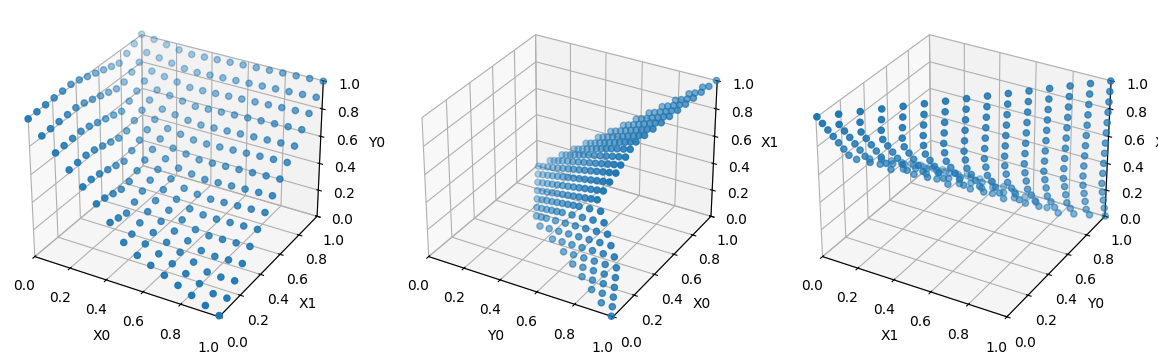

In [31]:
#%%capture --no-stderr "output.html"
n =  [0] + [1 for i in range(13)] + [10 for i in range(12)] + [20 for i in range(30)] 
n += [50 for i in range(10)] + [100 for i in range(31)] + [500 for i in range(20)]
sample_range = 15
samples = 4
total_n = 0

for _n in n:
    total_n += _n
    for _i in range(_n):
        for i in range(samples):
            x0 = x[i][0]
            x1 = x[i][1]
            ye = y[i]
            input_neurons, l1_output, l2_output = forward(x0,x1)
            ya = l2_output[0][0]
            loss = (ye-ya) ** 2
            calculate_gradients(ye,ya)
            gardient_decent(learning_rate=0.001)
            reset_gradients()

    print("\n\n\t\t\t After ", total_n, "number of Epochs: \n")
    closs = 0 
    #cap_id = 0
    for i in range(4):
        x0 = x[i][0]
        x1 = x[i][1]
        ye = y[i]
        input_neurons, l1_output, l2_output = forward(x0,x1)
        ya = l2_output[0][0]
        print("\tInput: " , x0, x1, " expected output: " , ye, " actual output: ", ya)
        closs += (ye-ya)**2
    closs = closs / 4.0
    print("\t\tavg loss = ", closs, "\n\n")
    
    
    # plot graph
    xaxis = np.linspace(0,1, sample_range)
    ya0vs = []
    for i in xaxis:
        for j in xaxis:
            input_neurons, l1_output, l2_output = forward(i,j)
            ya0vs.append([i,j,l2_output[0][0]])
    ya0vs = np.array(ya0vs)


    
    fig = plt.figure(figsize=plt.figaspect(0.333333))
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.grid()
    surf = ax.scatter(ya0vs[:,2], ya0vs[:,0], ya0vs[:,1])
    ax.set_zlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_xlim3d(0,1)
    ax.set_xlabel('Y0')
    ax.set_ylabel('X0')
    ax.set_zlabel('X1')
    
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.grid()
    surf = ax.scatter(ya0vs[:,1], ya0vs[:,2], ya0vs[:,0])
    ax.set_zlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_xlim3d(0,1)
    ax.set_xlabel('X1')
    ax.set_ylabel('Y0')
    ax.set_zlabel('X0')

    #fig = plt.figure(figsize=plt.figaspect(1.0))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.grid()
    surf = ax.scatter(ya0vs[:,0], ya0vs[:,1], ya0vs[:,2])
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(0,1)
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_zlabel('Y0')
    plt.show()
    reset_gradients()
    time.sleep(0.2)
    clear_output(wait=True)
    



In [32]:
printParameters(before=False)


parameters After the iteration
w0 =  [[-0.69467253 -0.19977858 -0.87592717 -0.08027932  0.57434045  0.50976174
   0.81900916  0.62288318]
 [-0.46158987  0.54606135 -0.81325349 -0.84062823  0.07884846  0.37476752
   0.84089339  0.62287891]]
b0 =  [[ 0.36235369  0.199753   -0.42372614 -0.33128309 -0.65367435 -0.50976431
  -0.31841146 -0.6228859 ]]
w1 = [[ 1.45667788]
 [ 1.34549446]
 [ 0.24467765]
 [-0.49376211]
 [-0.62207742]
 [ 0.54968879]
 [-0.37155661]
 [ 0.57722687]]
b1 = [[0.19456116]]
